# Compression study

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

from analysis import load_configs, load_experimental_results, get_stats
from factorization.config import IMAGE_DIR, USETEX
from factorization.models.mlp import Model

logging.basicConfig(level=logging.INFO)


rc("font", family="serif", size=8)
rc("text", usetex=USETEX)
if USETEX:
    rc("text.latex", preamble=r"\usepackage{times}")


def get_names(name):
    match name:
        case "compression":
            return "compression", ["compression_complexity", "statistical_complexity", "emb_dim", "scheduler"]

In [3]:
save_fig = False

## Verification of the convergence

In [9]:
name = "compression"
xaxis = "epoch"

kwargs = {
    "scheduler": "custom",
    "emb_dim": 36,
}

file_path, study_factors = get_names(name)

In [5]:
all_configs = load_configs(file_path)
res = load_experimental_results(all_configs, **kwargs)

In [6]:
all_mean, all_std, keys = get_stats(res, study_factors, xaxis=xaxis, **kwargs)

INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode


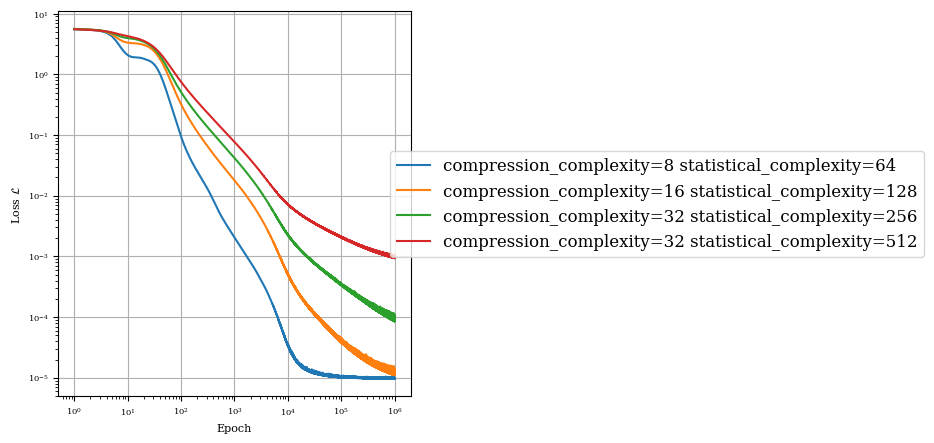

In [8]:
if save_fig:
    fig, ax = plt.subplots(1, 1, figsize=(1.75, 1.5))
else:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    ax = axes[0]

y_name = "loss"
legend = []
all_plots = []
for val, val_std in zip(all_mean, all_std):
    if val.shape[0] == 0:
        continue
    a, = ax.plot(val[y_name], linewidth=1.5)
    all_plots.append(a)
    leg = ' '.join([rf'{key}={val[key].values[0]}' for key in keys])
    legend.append(leg)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Epoch", fontsize=8)
ax.set_ylabel(r"Loss ${\cal L}$", fontsize=8)
ax.tick_params(axis='both', labelsize=6)
ax.grid()
if save_fig:
    fig.savefig(IMAGE_DIR / f'{name}.pdf', bbox_inches='tight')

if save_fig:
    fig, ax = plt.subplots(1, 1, figsize=(.25, 1.5))
    leg = ax.legend(all_plots, legend, loc='center', ncol=1, fontsize=6)
    ax.axis('off')
    fig.savefig(IMAGE_DIR / f'{name}_leg.pdf', bbox_inches='tight')
else:
    ax = axes[1]
    leg = ax.legend(all_plots, legend, loc='center', ncol=1, fontsize=12)
    ax.axis('off')

## Effect of embedding dimension

In [ ]:
name = "compression"
xaxis = "emb_dim"

kwargs = {
    "scheduler": "cosine",
    "final": True,
}

file_path, study_factors = get_names(name)

In [ ]:
all_configs = load_configs(file_path)
res = load_experimental_results(all_configs, **kwargs)

In [ ]:
all_mean, all_std, keys = get_stats(res, study_factors, xaxis=xaxis, **kwargs)

In [ ]:
if save_fig:
    fig, ax = plt.subplots(1, 1, figsize=(1.75, 1.5))
else:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    ax = axes[0]

y_name = "loss"
legend = []
all_plots = []
ind = 0
for val, val_std in zip(all_mean, all_std):
    if val.shape[0] == 0:
        continue
    ind += 1
    a, = ax.plot(val[y_name], linewidth=1.5)
    all_plots.append(a)
    # leg = ' '.join([rf'{key}={val[key].values[0]}' for key in keys])
    bar_chi = val[keys[0]].values[0]
    leg = rf'$\bar\chi=${bar_chi}, $\chi=${val[keys[1]].values[0]}'
    ax.plot([bar_chi, bar_chi], [5e-6, 5e0], linestyle='--', color=f'C{ind-1}', linewidth=1)
    legend.append(leg)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"Emb. dim. $d$", fontsize=8)
ax.set_ylabel(r"Loss ${\cal L}$", fontsize=8)
ax.tick_params(axis='both', labelsize=6)
ax.grid()
if save_fig:
    fig.savefig(IMAGE_DIR / f'{name}_emb.pdf', bbox_inches='tight')

if save_fig:
    fig, ax = plt.subplots(1, 1, figsize=(.25, 1.5))
    leg = ax.legend(all_plots, legend, loc='center', ncol=1, fontsize=6)
    ax.axis('off')
    fig.savefig(IMAGE_DIR / f'{name}_leg.pdf', bbox_inches='tight')
else:
    ax = axes[1]
    leg = ax.legend(all_plots, legend, loc='center', ncol=1, fontsize=12)
    ax.axis('off')

## Flop normalization

In [25]:
name = "compression"
xaxis = "flops"

kwargs = {
    "scheduler": "custom",
    "nb_parents": 1,
}

file_path, study_factors = get_names(name)
study_factors = ["emb_dim"]

In [26]:
all_configs = load_configs(file_path)
res = load_experimental_results(all_configs, **kwargs)

In [27]:
res['flops'] = Model.get_flops(res['emb_dim'], res['ffn_dim'], res['nb_layers'], res['output_size'])
res['flops'] *= res['epoch'] * res['input_size']

In [28]:
all_mean, all_std, keys = get_stats(res, study_factors, xaxis=xaxis, **kwargs)

INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode


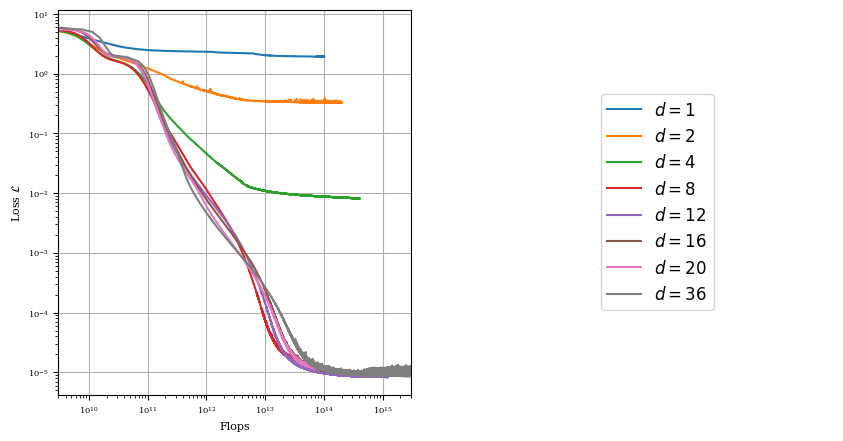

In [30]:
if save_fig:
    fig, ax = plt.subplots(1, 1, figsize=(1.75, 1.5))
else:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    ax = axes[0]

y_name = "loss"
legend = []
all_plots = []
ind = 0
for val, val_std in zip(all_mean, all_std):
    if val.shape[0] == 0:
        continue
    ind += 1
    if ind > 7 and ind < 11:
        continue
    a, = ax.plot(val[y_name], linewidth=1.5)
    all_plots.append(a)
    # leg = ' '.join([rf'{key}={val[key].values[0]}' for key in keys])
    leg = rf'$d={val[keys[0]].values[0]}$'
    legend.append(leg)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"Flops", fontsize=8)
ax.set_ylabel(r"Loss ${\cal L}$", fontsize=8)
ax.tick_params(axis='both', labelsize=6)
ax.grid()
ax.set_xlim(3e9, 3e15)
if save_fig:
    fig.savefig(IMAGE_DIR / f'{name}_flop.pdf', bbox_inches='tight')

if save_fig:
    fig, ax = plt.subplots(1, 1, figsize=(.25, 1.5))
    leg = ax.legend(all_plots, legend, loc='center', ncol=1, fontsize=6)
    ax.axis('off')
    fig.savefig(IMAGE_DIR / f'{name}_flop_leg.pdf', bbox_inches='tight')
else:
    ax = axes[1]
    leg = ax.legend(all_plots, legend, loc='center', ncol=1, fontsize=12)
    ax.axis('off')